In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

               author                  date  \
0        Chhavi Tyagi  03 Aug 2017,Thursday   
1         Daisy Mowke  03 Aug 2017,Thursday   
2      Arshiya Chopra  03 Aug 2017,Thursday   
3       Sumedha Sehra  03 Aug 2017,Thursday   
4  Aarushi Maheshwari  03 Aug 2017,Thursday   

                                           headlines  \
0  Daman & Diu revokes mandatory Rakshabandhan in...   
1  Malaika slams user who trolled her for 'divorc...   
2  'Virgin' now corrected to 'Unmarried' in IGIMS...   
3  Aaj aapne pakad liya: LeT man Dujana before be...   
4  Hotel staff to get training to spot signs of s...   

                                           read_more  \
0  http://www.hindustantimes.com/india-news/raksh...   
1  http://www.hindustantimes.com/bollywood/malaik...   
2  http://www.hindustantimes.com/patna/bihar-igim...   
3  http://indiatoday.intoday.in/story/abu-dujana-...   
4  http://indiatoday.intoday.in/story/sex-traffic...   

                                           

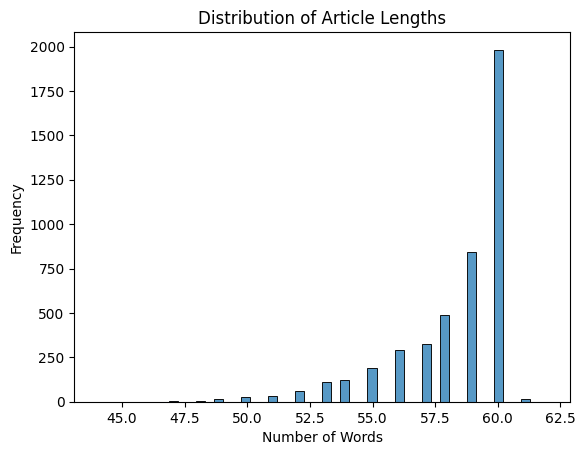

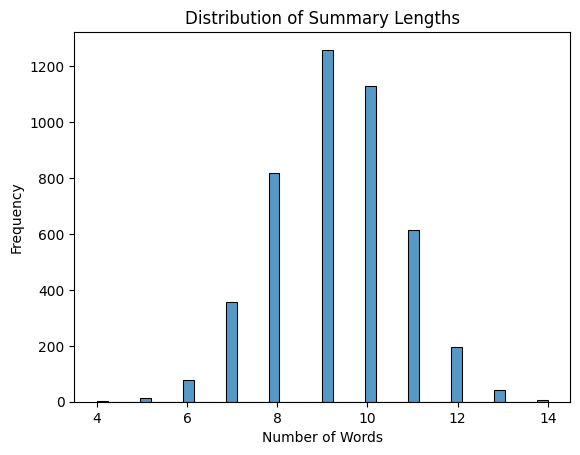

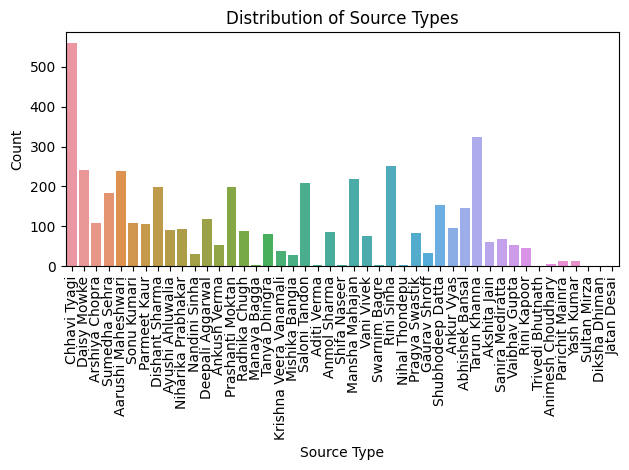

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'/content/drive/MyDrive/IR Dataset/News Summary/news_summary.csv', encoding='ISO-8859-1')
df1 = pd.read_csv(r'/content/drive/MyDrive/IR Dataset/News Summary/articles1.csv', encoding='ISO-8859-1')

path = '/content/drive/MyDrive/IR Dataset/News Summary/df_saved.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

# Print the first five rows of the dataset
print(df.head())

# Print the shape of the dataset
print('Shape of the dataset:', df.shape)

# Print the columns of the dataset
print('Columns of the dataset:', df.columns)

# Check for missing values
print('Missing values in the dataset:\n', df.isnull().sum())

# Check for duplicates
print('Number of duplicate rows:', df.duplicated().sum())

# Print the summary statistics of the dataset
print(df.describe())

# Plot the distribution of article lengths
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
sns.histplot(df['text_length'], kde=False)
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of summary lengths
df['summary_length'] = df['headlines'].apply(lambda x: len(x.split()))
sns.histplot(df['summary_length'], kde=False)
plt.title('Distribution of Summary Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

sns.countplot(x='author', data=df)
plt.xticks(rotation=90, ha='center')
plt.title('Distribution of Source Types')
plt.xlabel('Source Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

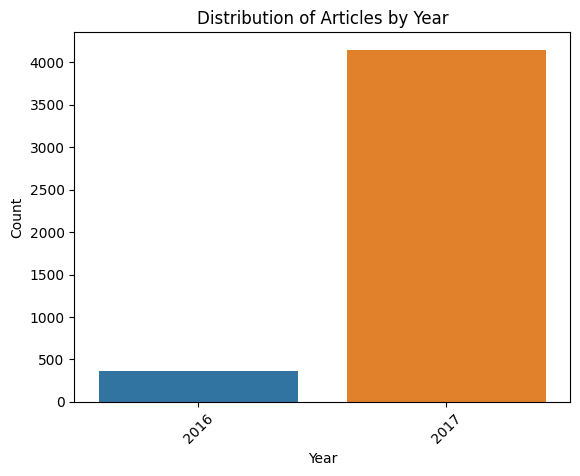

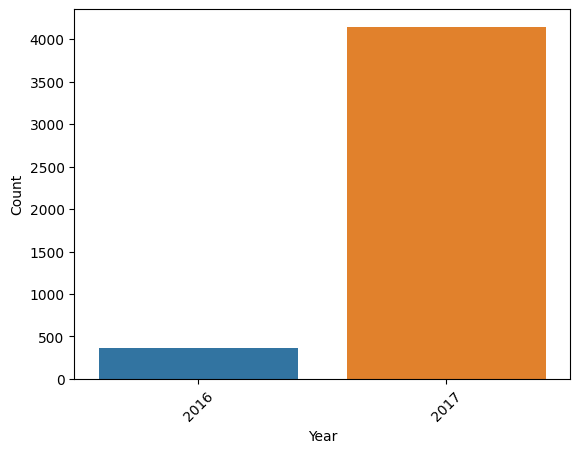

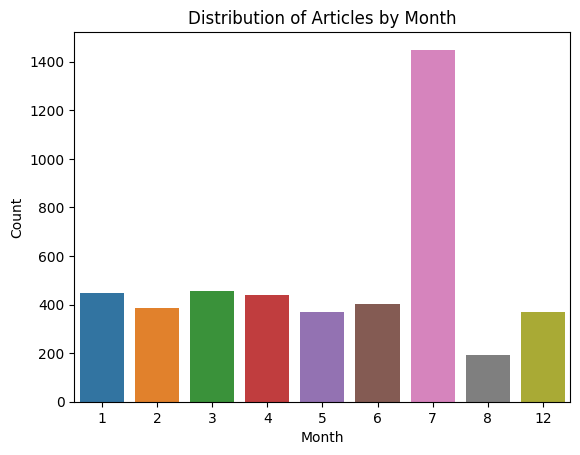

In [ ]:
# Extract year and month from the date column
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

# Plot the distribution of articles and summaries by year
sns.countplot(x='year', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Articles by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

sns.countplot(x='year', data=df)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Plot the distribution of articles and summaries by month
sns.countplot(x='month', data=df)
plt.title('Distribution of Articles by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

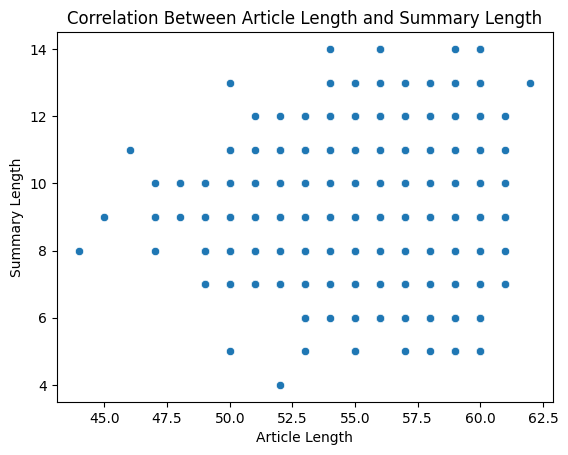

In [ ]:
# Plot the correlation between article length and summary length
sns.scatterplot(x='text_length', y='summary_length', data=df)
plt.title('Correlation Between Article Length and Summary Length')
plt.xlabel('Article Length')
plt.ylabel('Summary Length')
plt.show()

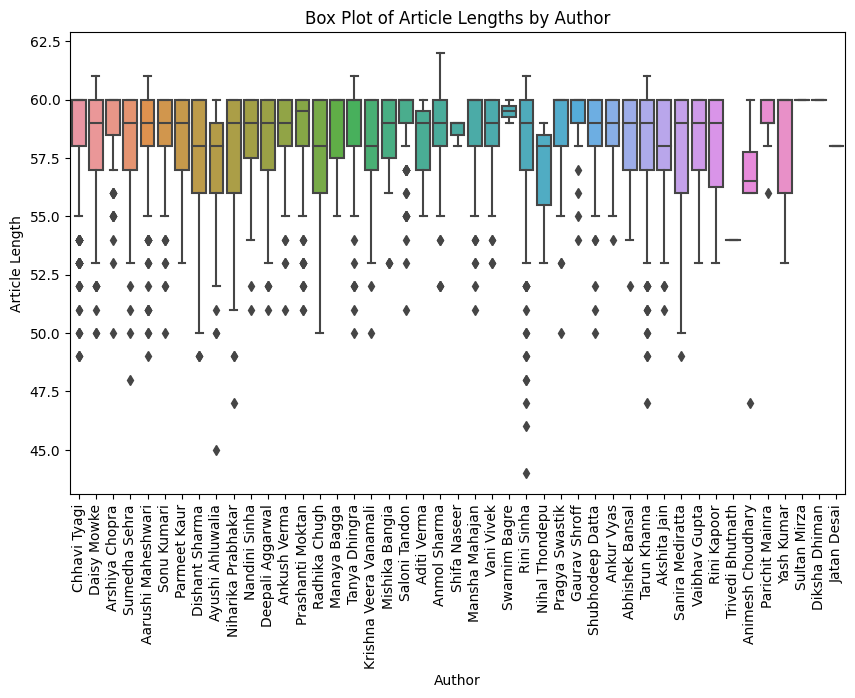

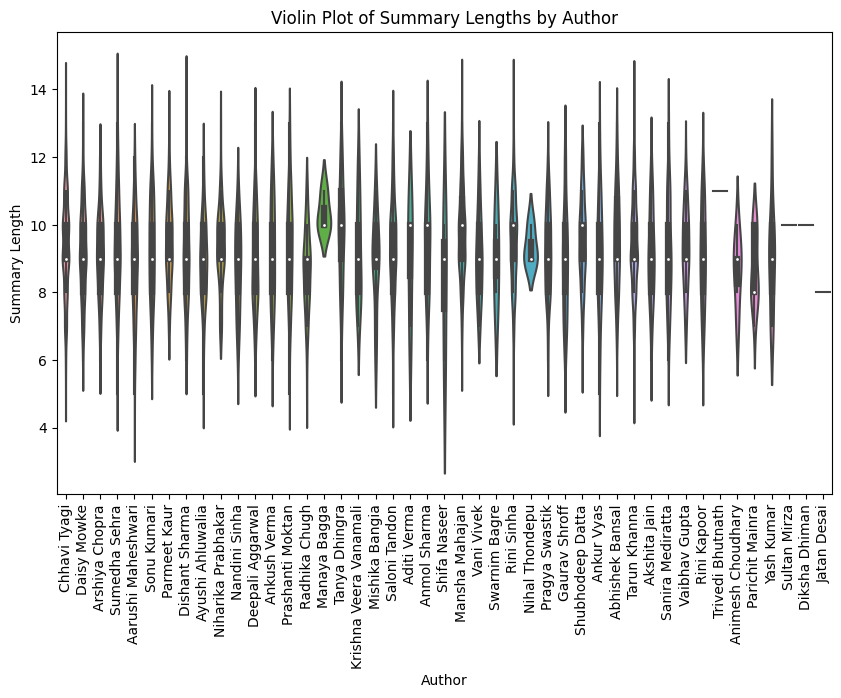

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='author', y='text_length', data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Article Lengths by Author')
plt.xlabel('Author')
plt.ylabel('Article Length')
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(x='author', y='summary_length', data=df)
plt.xticks(rotation=90)
plt.title('Violin Plot of Summary Lengths by Author')
plt.xlabel('Author')
plt.ylabel('Summary Length')
plt.show()


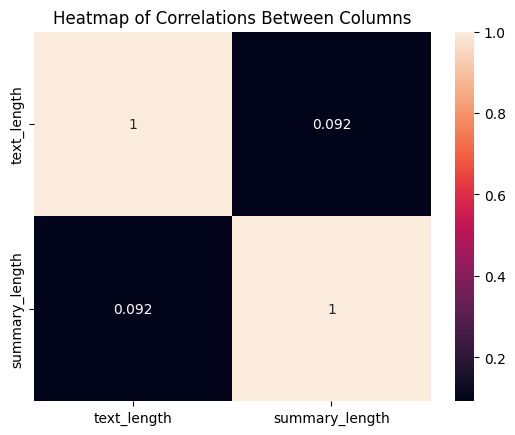

In [ ]:
corr = df[['text_length', 'summary_length', 'author']].corr()
sns.heatmap(corr, annot=True)
plt.title('Heatmap of Correlations Between Columns')
plt.show()

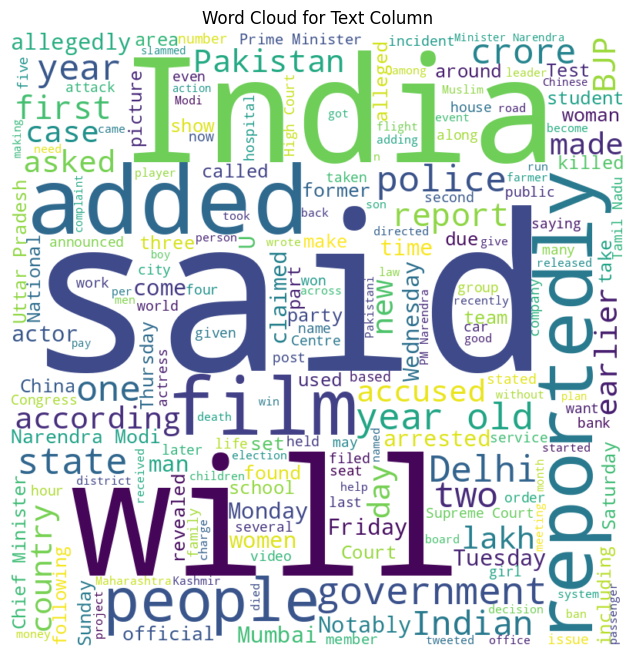

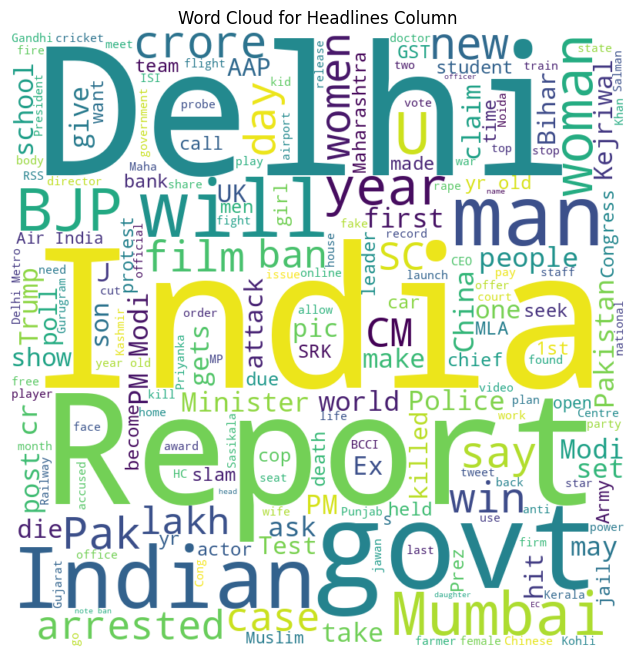

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for the text column
text = ' '.join(df['text'].tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text Column')
plt.show()

# Generate word cloud for the headlines column
headlines = ' '.join(df['headlines'].tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(headlines)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Headlines Column')
plt.show()

In [ ]:
!pip install sentencepiece
!pip install transformers
!pip install rouge
!pip install jamspell
import nltk
nltk.download('stopwords')
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 96.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This err

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import re
import string
import nltk
import pandas as pd
import spacy
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import T5Tokenizer, T5ForConditionalGeneration, BartTokenizer, BartForConditionalGeneration, GPT2Tokenizer, GPT2LMHeadModel
from rouge import Rouge

# Load the data
df = pd.read_csv('/content/drive/MyDrive/IR Dataset/News Summary/news_summary.csv', encoding='ISO-8859-1')
df = df[0:50]

# Load the tokenizer and model for T5
def generate_summary_t5(text):
    tokenizer = T5Tokenizer.from_pretrained('t5-small')
    model = T5ForConditionalGeneration.from_pretrained('t5-small')
    
    # Tokenize the article text
    inputs = tokenizer.encode("summarize: " + text, return_tensors='pt', max_length=512, truncation=True)

    # Generate the summary
    summary_ids = model.generate(inputs,
                                 num_beams=4,
                                 no_repeat_ngram_size=2,
                                 min_length=30,
                                 max_length=100,
                                 early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

# Load the tokenizer and model for BART
def generate_summary_bart(text):
    tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
    model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
    
    # Tokenize the article text
    inputs = tokenizer(text, max_length=1024, truncation=True, return_tensors='pt')

    # Generate the summary
    summary_ids = model.generate(inputs['input_ids'], num_beams=4, length_penalty=2.0, max_length=142, min_length=56, no_repeat_ngram_size=3)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

# Load the tokenizer and model for GPT-2
def generate_summary_gpt2(text):
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
    model = GPT2LMHeadModel.from_pretrained('gpt2')
    
    # Tokenize the article text
    inputs = tokenizer.encode(text, return_tensors='pt')

    # Generate the summary
    summary_ids = model.generate(inputs,
                                 max_length=1000,
                                 num_beams=4,
                                 no_repeat_ngram_size=2,
                                 early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

# Preprocess the text
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove HTML tags and URLs
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'http\S+', '', text)
    
    # Tokenize the text using NLTK
    tokens = nltk.word_tokenize(text.lower())

    # Remove stopwords and punctuation
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]

    # Lemmatize the tokens using spaCy
    lemmas = [token.lemma_ for token in nlp(" ".join(tokens))]

    # Remove any remaining non-alphabetic tokens
    lemmas = [lemma for lemma in lemmas if lemma.isalpha()]

    # Join the lemmas back into a string
    text = " ".join(lemmas)

    return text






In [ ]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['preprocessed_text'])
summaries_t5 = []
for text in df['text']:
    summary = generate_summary_t5(text)
    summaries_t5.append(summary)
df['generated_summary_t5'] = summaries_t5
summaries_bart = []
for text in df['text']:
    summary = generate_summary_bart(text)
    summaries_bart.append(summary)
df['generated_summary_bart'] = summaries_bart
summaries_gpt2 = []
for text in df['text']:
    summary = generate_summary_gpt2(text)
    summaries_gpt2.append(summary)
df['generated_summary_gpt2'] = summaries_gpt2
rouge = Rouge()
rouge_scores_t5 = []
rouge_scores_bart = []
rouge_scores_gpt2 = []
for i in range(len(df)):
    reference = df['headlines'][i]
    summary = df['generated_summary_t5'][i]
    scores_summary = rouge.get_scores(summary, reference)
    rouge_scores_t5.append(scores_summary[0])    
df['rouge_scores_t5'] = rouge_scores_t5
for i in range(len(df)):
    reference = df['headlines'][i]
    summary = df['generated_summary_bart'][i]
    scores_summary = rouge.get_scores(summary, reference)
    rouge_scores_bart.append(scores_summary[0])    
df['rouge_scores_bart'] = rouge_scores_bart
for i in range(len(df)):
    reference = df['headlines'][i]
    summary = df['generated_summary_gpt2'][i]
    scores_summary = rouge.get_scores(summary, reference)
    rouge_scores_gpt2.append(scores_summary[0])    
df['rouge_scores_gpt2'] = rouge_scores_gpt2
mean_rouge_t5 = sum([score['rouge-1']['f'] for score in df['rouge_scores_t5']])/len(df)
mean_rouge_bart = sum([score['rouge-1']['f'] for score in df['rouge_scores_bart']])/len(df)
mean_rouge_gpt2 = sum([score['rouge-1']['f'] for score in df['rouge_scores_gpt2']])/len(df)

print("Mean ROUGE scores:")
print("T5:", mean_rouge_t5)
print("BART:", mean_rouge_bart)
print("GPT-2:", mean_rouge_gpt2)

/usr/local/lib/python3.9/dist-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generatio

Mean ROUGE scores:
T5: 0.18962468690057446
BART: 0.19770931733775243
GPT-2: 0.15309382505728408


In [ ]:
from nltk.translate.bleu_score import corpus_bleu

# Calculate BLEU scores for T5-generated summaries
references = [[headline.split()] for headline in df['headlines']]
summaries = [summary.split() for summary in df['generated_summary_t5']]
bleu_t5 = corpus_bleu(references, summaries)

# Calculate BLEU scores for BART-generated summaries
references = [[headline.split()] for headline in df['headlines']]
summaries = [summary.split() for summary in df['generated_summary_bart']]
bleu_bart = corpus_bleu(references, summaries)

# Calculate BLEU scores for GPT-2-generated summaries
references = [[headline.split()] for headline in df['headlines']]
summaries = [summary.split() for summary in df['generated_summary_gpt2']]
bleu_gpt2 = corpus_bleu(references, summaries)

print("BLEU scores:")
print("T5:", bleu_t5)
print("BART:", bleu_bart)
print("GPT-2:", bleu_gpt2)

BLEU scores:
T5: 0.022856325178481192
BART: 0.01950847739235876
GPT-2: 0.012188501945424611


In [ ]:
import nltk

def calculate_f1_scores(df):
    nltk.download('punkt')
    summaries_t5 = df['generated_summary_t5']
    summaries_bart = df['generated_summary_bart']
    summaries_gpt2 = df['generated_summary_gpt2']
    reference_summaries = df['headlines']

    # Calculate F1 scores for T5
    f1_t5 = []
    for summary, reference in zip(summaries_t5, reference_summaries):
        f1 = nltk.translate.bleu_score.sentence_bleu([reference], summary, weights=(1, 0, 0, 0))
        f1_t5.append(f1)

    # Calculate F1 scores for BART
    f1_bart = []
    for summary, reference in zip(summaries_bart, reference_summaries):
        f1 = nltk.translate.bleu_score.sentence_bleu([reference], summary, weights=(1, 0, 0, 0))
        f1_bart.append(f1)

    # Calculate F1 scores for GPT-2
    f1_gpt2 = []
    for summary, reference in zip(summaries_gpt2, reference_summaries):
        f1 = nltk.translate.bleu_score.sentence_bleu([reference], summary, weights=(1, 0, 0, 0))
        f1_gpt2.append(f1)

    # Print the F1 scores
    print("F1 score for T5:", sum(f1_t5)/len(f1_t5))
    print("F1 score for BART:", sum(f1_bart)/len(f1_bart))
    print("F1 score for GPT-2:", sum(f1_gpt2)/len(f1_gpt2))
    return [f1_t5,f1_bart,f1_gpt2]

In [ ]:
f1s = calculate_f1_scores(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


F1 score for T5: 0.2945619740953616
F1 score for BART: 0.18573780398899126
F1 score for GPT-2: 0.11151585288385776


<ipython-input-44-4776ad3b3090>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


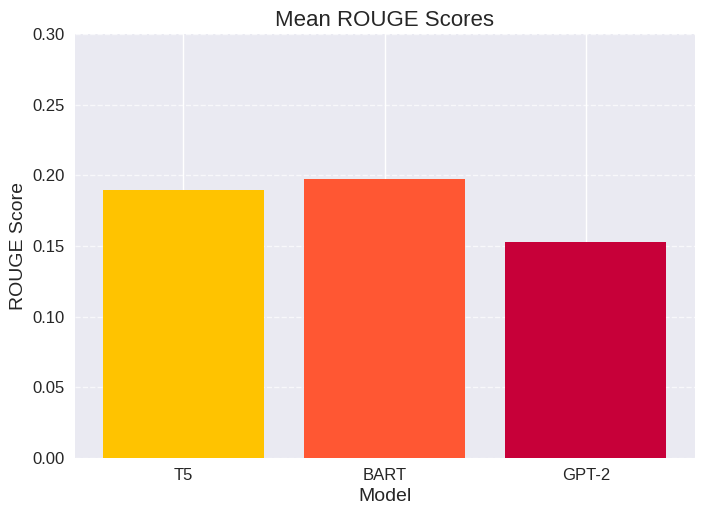

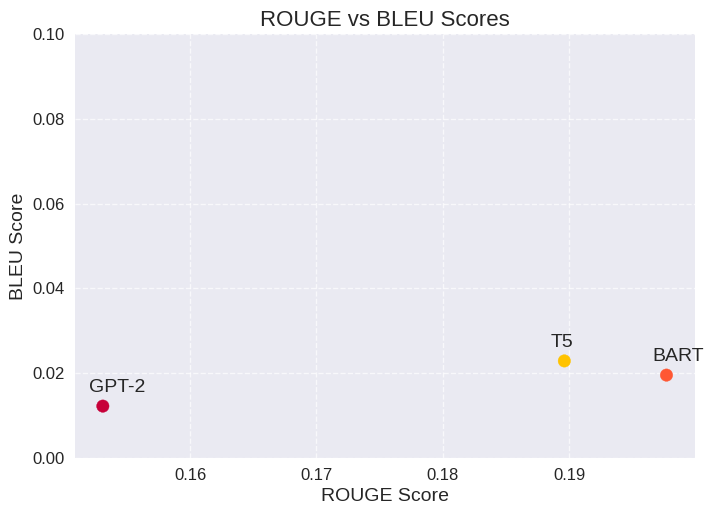

In [ ]:
import matplotlib.pyplot as plt

# Styling
plt.style.use('seaborn')

# Bar plot for mean ROUGE scores
models = ['T5', 'BART', 'GPT-2']
mean_rouge_scores = [mean_rouge_t5, mean_rouge_bart, mean_rouge_gpt2]
plt.bar(models, mean_rouge_scores, color=['#FFC300', '#FF5733', '#C70039'])
plt.title('Mean ROUGE Scores', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('ROUGE Score', fontsize=14)
plt.ylim(0, 0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Scatter plot for BLEU scores
bleu_scores = [bleu_t5, bleu_bart, bleu_gpt2]
plt.figure()
plt.scatter(mean_rouge_scores, bleu_scores, s=80, color=['#FFC300', '#FF5733', '#C70039'])
plt.title('ROUGE vs BLEU Scores', fontsize=16)
plt.xlabel('ROUGE Score', fontsize=14)
plt.ylabel('BLEU Score', fontsize=14)
plt.ylim(0, 0.1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
for i, model in enumerate(models):
    plt.annotate(model, (mean_rouge_scores[i], bleu_scores[i]), fontsize=14, xytext=(-10, 10), textcoords='offset points')

plt.show()





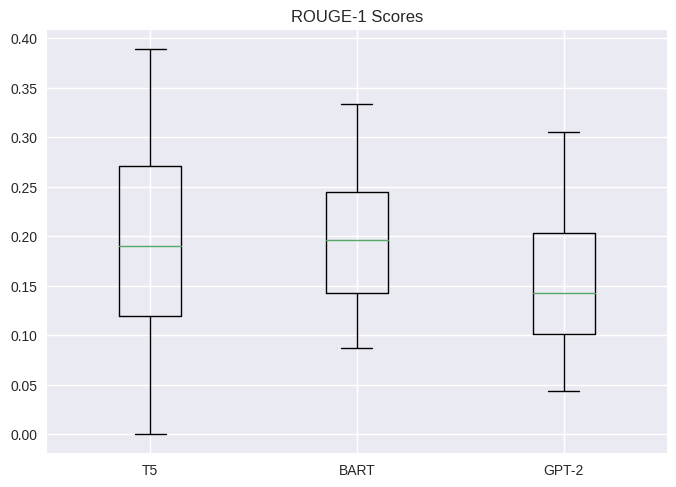

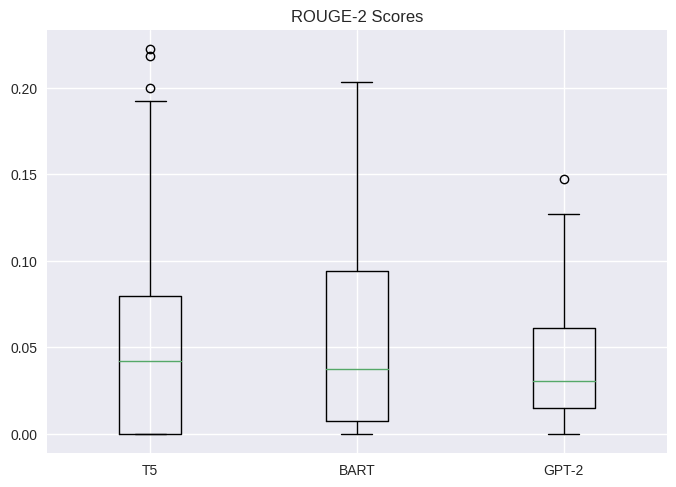

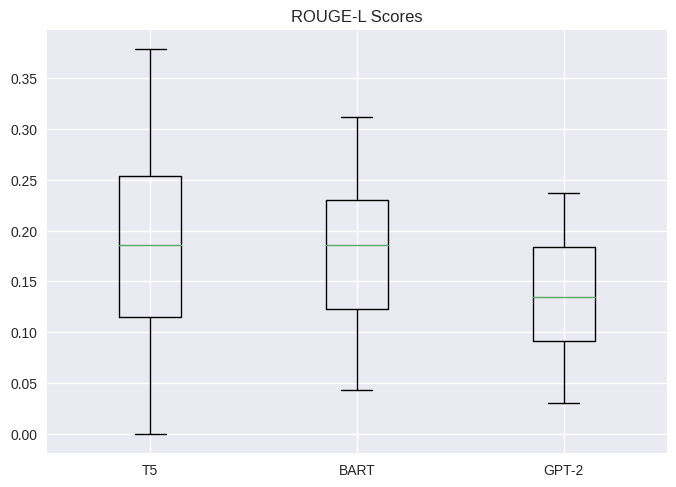

In [ ]:
import matplotlib.pyplot as plt

# Extract ROUGE scores
rouge_1_scores_t5 = [score['rouge-1']['f'] for score in df['rouge_scores_t5']]
rouge_1_scores_bart = [score['rouge-1']['f'] for score in df['rouge_scores_bart']]
rouge_1_scores_gpt2 = [score['rouge-1']['f'] for score in df['rouge_scores_gpt2']]
rouge_2_scores_t5 = [score['rouge-2']['f'] for score in df['rouge_scores_t5']]
rouge_2_scores_bart = [score['rouge-2']['f'] for score in df['rouge_scores_bart']]
rouge_2_scores_gpt2 = [score['rouge-2']['f'] for score in df['rouge_scores_gpt2']]
rouge_l_scores_t5 = [score['rouge-l']['f'] for score in df['rouge_scores_t5']]
rouge_l_scores_bart = [score['rouge-l']['f'] for score in df['rouge_scores_bart']]
rouge_l_scores_gpt2 = [score['rouge-l']['f'] for score in df['rouge_scores_gpt2']]

# Create box plots
plt.boxplot([rouge_1_scores_t5, rouge_1_scores_bart, rouge_1_scores_gpt2])
plt.xticks([1, 2, 3], ['T5', 'BART', 'GPT-2'])
plt.title('ROUGE-1 Scores')
plt.show()

plt.boxplot([rouge_2_scores_t5, rouge_2_scores_bart, rouge_2_scores_gpt2])
plt.xticks([1, 2, 3], ['T5', 'BART', 'GPT-2'])
plt.title('ROUGE-2 Scores')
plt.show()

plt.boxplot([rouge_l_scores_t5, rouge_l_scores_bart, rouge_l_scores_gpt2])
plt.xticks([1, 2, 3], ['T5', 'BART', 'GPT-2'])
plt.title('ROUGE-L Scores')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


F1 score for T5: 0.2945619740953616
F1 score for BART: 0.18573780398899126
F1 score for GPT-2: 0.11151585288385776


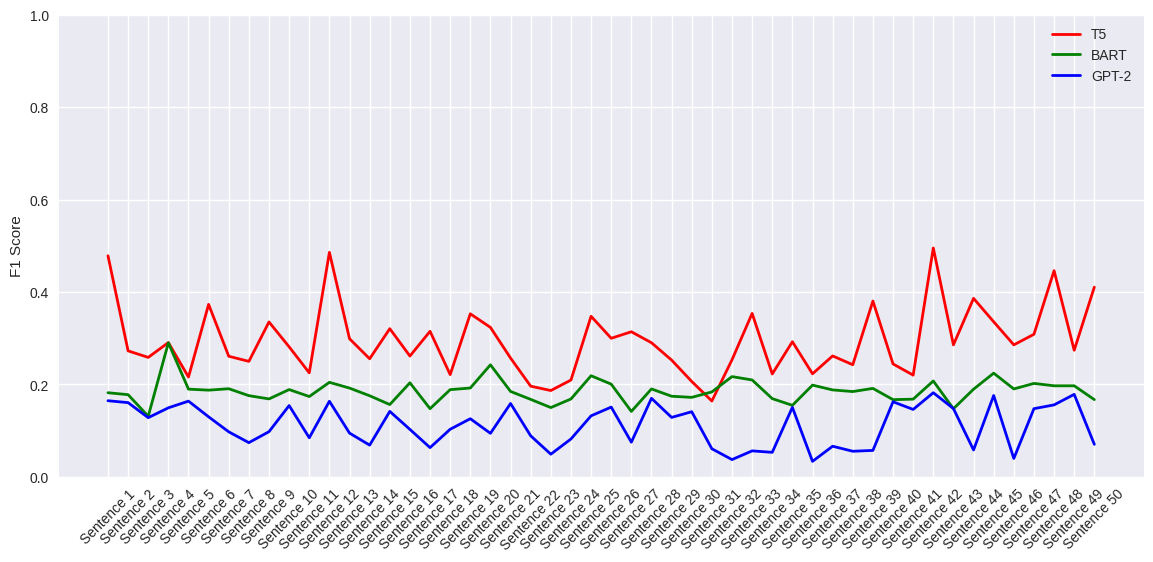

In [ ]:
import matplotlib.pyplot as plt


f1_scores = calculate_f1_scores(df)
models = ['T5', 'BART', 'GPT-2']
colors = ['r', 'g', 'b']

    # create a figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

    # plot the lines
for i, model in enumerate(models):
    ax.plot(f1_scores[i], label=model, color=colors[i], linewidth=2)

    # set the x-axis labels
ax.set_xticks(range(len(f1_scores[0])))
ax.set_xticklabels([f'Sentence {i+1}' for i in range(len(f1_scores[0]))], rotation=45)

    # set the y-axis label and limits
ax.set_ylabel('F1 Score')
ax.set_ylim(0, 1)

    # add a legend
ax.legend()

    # show the plot
plt.show()

In [ ]:
df= df.drop(['ctext'], axis=1)

In [ ]:
df.head()

author                  date  \
0        Chhavi Tyagi  03 Aug 2017,Thursday   
1         Daisy Mowke  03 Aug 2017,Thursday   
2      Arshiya Chopra  03 Aug 2017,Thursday   
3       Sumedha Sehra  03 Aug 2017,Thursday   
4  Aarushi Maheshwari  03 Aug 2017,Thursday   

                                           headlines  \
0  Daman & Diu revokes mandatory Rakshabandhan in...   
1  Malaika slams user who trolled her for 'divorc...   
2  'Virgin' now corrected to 'Unmarried' in IGIMS...   
3  Aaj aapne pakad liya: LeT man Dujana before be...   
4  Hotel staff to get training to spot signs of s...   

                                           read_more  \
0  http://www.hindustantimes.com/india-news/raksh...   
1  http://www.hindustantimes.com/bollywood/malaik...   
2  http://www.hindustantimes.com/patna/bihar-igim...   
3  http://indiatoday.intoday.in/story/abu-dujana-...   
4  http://indiatoday.intoday.in/story/sex-traffic...   

                                                text  \
0  The Administration of Union Territory Daman an...   
1  Malaika Arora slammed an Instagram user who tr...   
2  The Indira Gandhi Institute of Medical Science...   
3  Lashkar-e-Taiba's Kashmir commander Abu Dujana...   
4  Hotels in Maharashtra will train their staff t...   

                                   preprocessed_text  \
0  administration union territory daman diu revok...   
1  malaika arora slammed instagram user troll div...   
2  indira gandhi institute medical sciences igim ...   
3  lashkar e taiba kashmir commander abu dujana k...   
4  hotels maharashtra train staff spot sign sex t...   

                                generated_summary_t5  \
0  the order made it compulsory for women to tie ...   
1  malaika Arora slams an Instagram user who trol...   
2  the indiana Gandhi institute of medical scienc...   
3  kabhi hum aage was killed by security forces. ...   
4  hotels in Maharashtra will train staff to spot...   

                              generated_summary_bart  \
0  The Administration of Union Territory Daman an...   
1  Malaika Arora slammed an Instagram user who tr...   
2  The Indira Gandhi Institute of Medical Science...   
3  Lashkar-e-Taiba's Kashmir commander Abu Dujana...   
4  Hotels in Maharashtra will train their staff t...   

                              generated_summary_gpt2  \
0  The Administration of Union Territory Daman an...   
1  Malaika Arora slammed an Instagram user who tr...   
2  The Indira Gandhi Institute of Medical Science...   
3  Lashkar-e-Taiba's Kashmir commander Abu Dujana...   
4  Hotels in Maharashtra will train their staff t...   

                                     rouge_scores_t5  \
0  {'rouge-1': {'r': 0.2222222222222222, 'p': 0.1...   
1  {'rouge-1': {'r': 0.7, 'p': 0.1944444444444444...   
2  {'rouge-1': {'r': 0.25, 'p': 0.090909090909090...   
3  {'rouge-1': {'r': 0.1, 'p': 0.0322580645161290...   
4  {'rouge-1': {'r': 0.7, 'p': 0.1707317073170731...   

                                   rouge_scores_bart  \
0  {'rouge-1': {'r': 0.3333333333333333, 'p': 0.0...   
1  {'rouge-1': {'r': 0.7, 'p': 0.1372549019607843...   
2  {'rouge-1': {'r': 0.375, 'p': 0.0625, 'f': 0.1...   
3  {'rouge-1': {'r': 0.4, 'p': 0.1379310344827586...   
4  {'rouge-1': {'r': 0.7, 'p': 0.1555555555555555...   

                                   rouge_scores_gpt2  
0  {'rouge-1': {'r': 0.4444444444444444, 'p': 0.0...  
1  {'rouge-1': {'r': 0.7, 'p': 0.125, 'f': 0.2121...  
2  {'rouge-1': {'r': 0.625, 'p': 0.09090909090909...  
3  {'rouge-1': {'r': 0.4, 'p': 0.0701754385964912...  
4  {'rouge-1': {'r': 0.6, 'p': 0.1153846153846153...

In [ ]:
!!sudo apt-get install swig3.0
!pip install jamspell

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import jamspell
import pandas as pd

# Load the JamSpell model
corrector = jamspell.TSpellCorrector()
corrector.LoadLangModel('Downloads/en_model.bin')

# Define a function to correct the spellings in a list of summaries
def correct_summaries(summaries):
    corrected_summaries = []
    for summary in summaries:
        corrected_summary = corrector.FixFragment(summary)
        corrected_summaries.append(corrected_summary)
    return corrected_summaries

# Correct the spellings in all the summaries
corrected_summaries_t5 = correct_summaries(df['generated_summary_t5'])
corrected_summaries_bart = correct_summaries(df['generated_summary_bart'])
corrected_summaries_gpt2 = correct_summaries(df['generated_summary_gpt2'])
corrected_reference_summaries = correct_summaries(df['headlines'])

# Store the corrected summaries back in the DataFrame (optional)
df['corrected_summary_t5'] = corrected_summaries_t5
df['corrected_summary_bart'] = corrected_summaries_bart
df['corrected_summary_gpt2'] = corrected_summaries_gpt2
df['corrected_headlines'] = corrected_reference_summaries


In [ ]:
print("T5 summaries: \n",corrected_summaries_t5)
print("BART summaries: \n",corrected_summaries_bart)
print("GPT2 summaries: \n",corrected_summaries_gpt2)
print("Reference summaries: \n",corrected_reference_summaries)
print("Original dataframe summaries: \n",df.head())


T5 summaries: 
 ['the order made it compulsory for women to tie rakhis to male colleagues on the occasion of Rakshabandhan on august 7.', 'malaika Arora slams an Instagram user who trolled her for "divorcing a rich man" and "having fun with the alimony" "her life now is all about wearing short clothes, going to gym or salon, enjoying vacation[s]"', "the indiana Gandhi institute of medical sciences changed 'Virgin' option to unmarried' the institute faced strong backlash for asking new recruits to declare their virginity.", 'kabhi hum aage was killed by security forces. he said: "i won\'t surrender, and whatever is in his fate will happen to him" "they shaheed hone (had left home for martyrdom)"', "hotels in Maharashtra will train staff to spot signs of sex trafficking. a mobile phone app called Rescue Me will be developed to alert police of suspicious behaviour, including frequent requests for bed linen changes and 'Do not disturb' signs left on room doors for days.", 'a 32-year-old ma

### **Dataset 2**

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
   Unnamed: 0     id                                              title  \
0           0  17283  House Republicans Fret About Winning Their Hea...   
1           1  17284  Rift Between Officers and Residents as Killing...   
2           2  17285  Tyrus Wong, âBambiâ Artist Thwarted by Rac...   
3           3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...   
4           4  17287  Kim Jong-un Says North Korea Is Preparing to T...   

      publication                         author        date    year  month  \
0  New York Times                     Carl Hulse  2016-12-31  2016.0   12.0   
1  New York Times  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0   
2  New York Times                   Margalit Fox  2017-01-06  2017.0    1.0   
3  New York Times               William McDonald  2017-04-10  2017.0    4.0   
4  New York Times                  Choe Sang-Hun  2017-

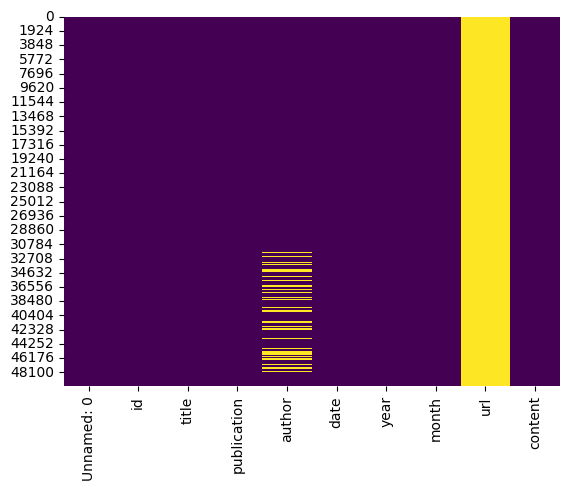

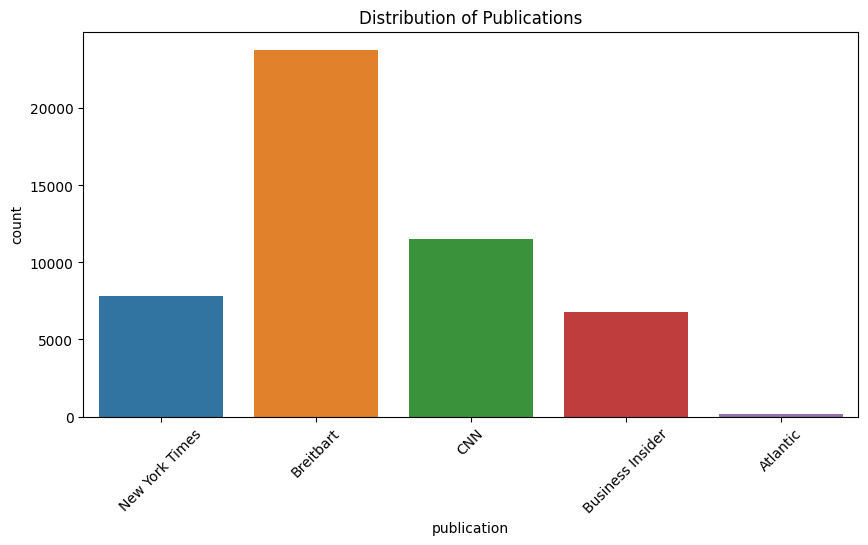

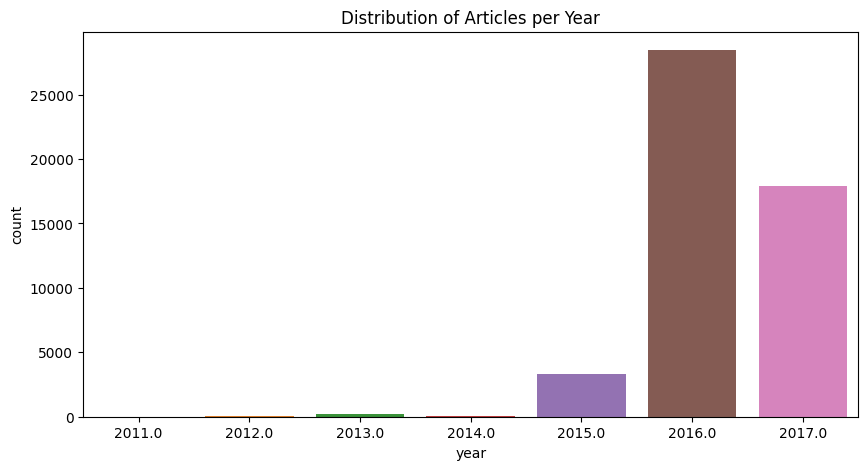

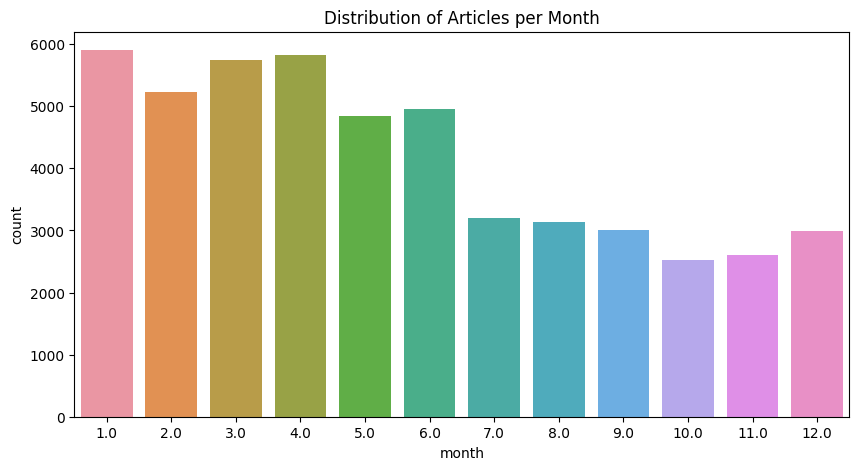

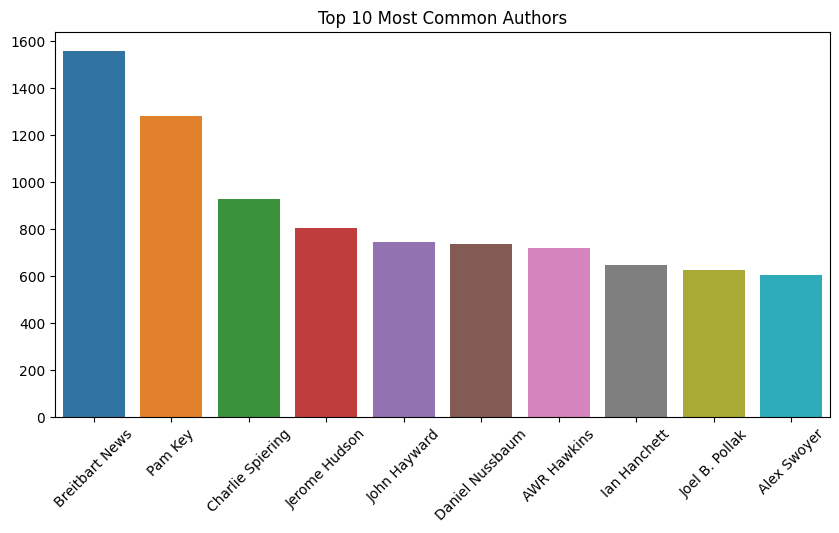

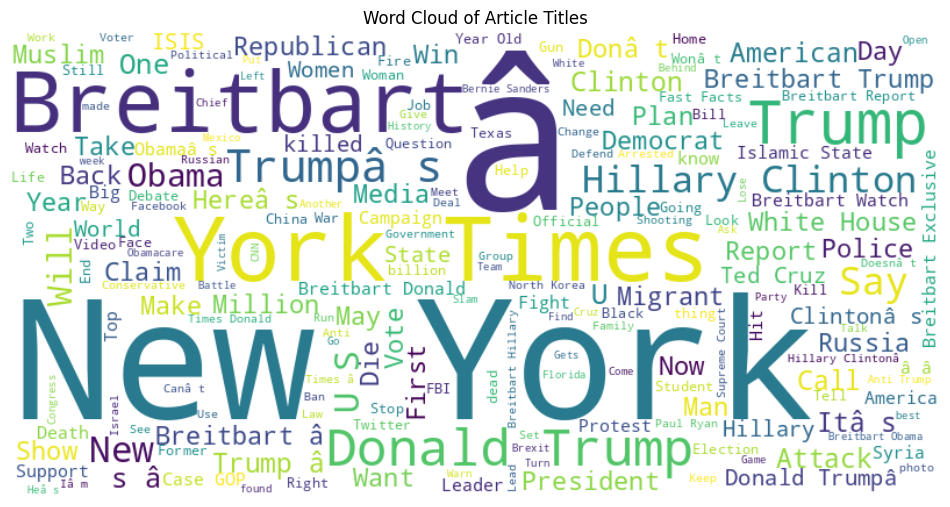

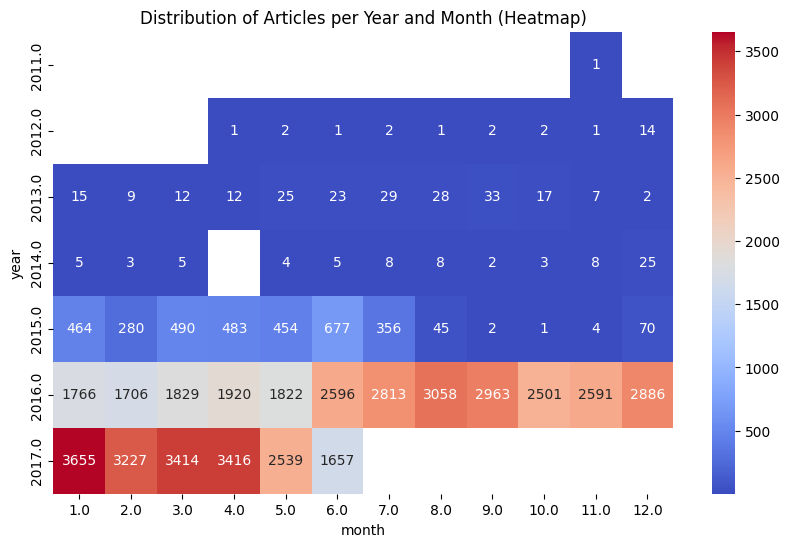

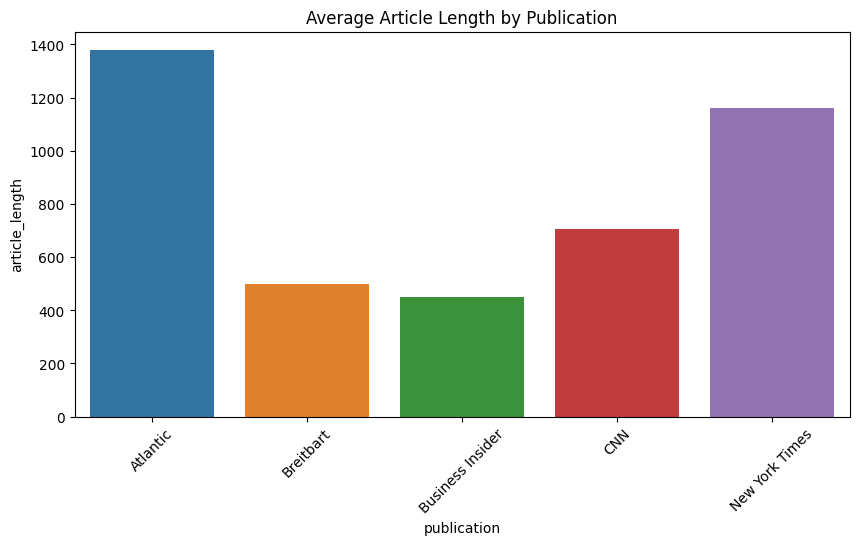

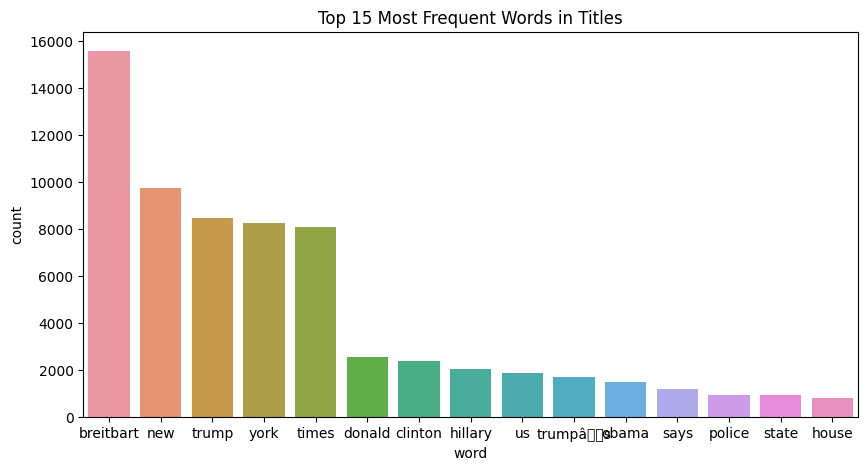

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install seaborn plotly


print(df1.head())

# Display summary statistics
print(df1.describe())

# Check for missing values
print(df1.isnull().sum())

# Visualize missing values (if any)
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.show()

# Distribution of publications
plt.figure(figsize=(10, 5))
sns.countplot(data=df1, x='publication')
plt.xticks(rotation=45)
plt.title('Distribution of Publications')
plt.show()

# Distribution of articles per year
plt.figure(figsize=(10, 5))
sns.countplot(data=df1, x='year')
plt.title('Distribution of Articles per Year')
plt.show()

# Distribution of articles per month
plt.figure(figsize=(10, 5))
sns.countplot(data=df1, x='month')
plt.title('Distribution of Articles per Month')
plt.show()

# Top 10 most common authors
plt.figure(figsize=(10, 5))
top_authors = df1['author'].value_counts().head(10)
sns.barplot(x=top_authors.index, y=top_authors.values)
plt.xticks(rotation=45)
plt.title('Top 10 Most Common Authors')
plt.show()

# Word cloud for article titles
from wordcloud import WordCloud

plt.figure(figsize=(12, 8))
title_wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(df1['title']))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Article Titles')
plt.show()

import plotly.express as px
import plotly.graph_objs as go

# Distribution of articles per year and month (heatmap)
year_month_df1 = df1.groupby(['year', 'month']).size().reset_index(name='count')
year_month_pivot = year_month_df1.pivot('year', 'month', 'count')
plt.figure(figsize=(10, 6))
sns.heatmap(year_month_pivot, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Distribution of Articles per Year and Month (Heatmap)')
plt.show()

# Interactive scatterplot of publication counts per author
author_pub_counts = df1.groupby(['author', 'publication']).size().reset_index(name='count')
fig = px.scatter(author_pub_counts, x='author', y='count', color='publication', hover_name='author', hover_data=['publication'], size='count', title='Publication Counts per Author (Interactive)')
fig.update_xaxes(showticklabels=False)
fig.show()

# Interactive bar chart for the number of articles per publication by year
pub_year_counts = df1.groupby(['publication', 'year']).size().reset_index(name='count')
fig = px.bar(pub_year_counts, x='year', y='count', color='publication', barmode='group', text='count', title='Number of Articles per Publication by Year (Interactive)')
fig.update_traces(textposition='outside')
fig.show()

# Average article length by publication
df1['article_length'] = df1['content'].apply(lambda x: len(x.split()))
avg_length_by_pub = df1.groupby('publication')['article_length'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=avg_length_by_pub, x='publication', y='article_length')
plt.xticks(rotation=45)
plt.title('Average Article Length by Publication')
plt.show()

# Word frequency in titles
from collections import Counter
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english'))

def process_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

title_words = df1['title'].apply(process_text).explode()
word_counts = Counter(title_words).most_common(15)
word_counts_df = pd.DataFrame(word_counts, columns=['word', 'count'])

plt.figure(figsize=(10, 5))
sns.barplot(data=word_counts_df, x='word', y='count')
plt.title('Top 15 Most Frequent Words in Titles')
plt.show()


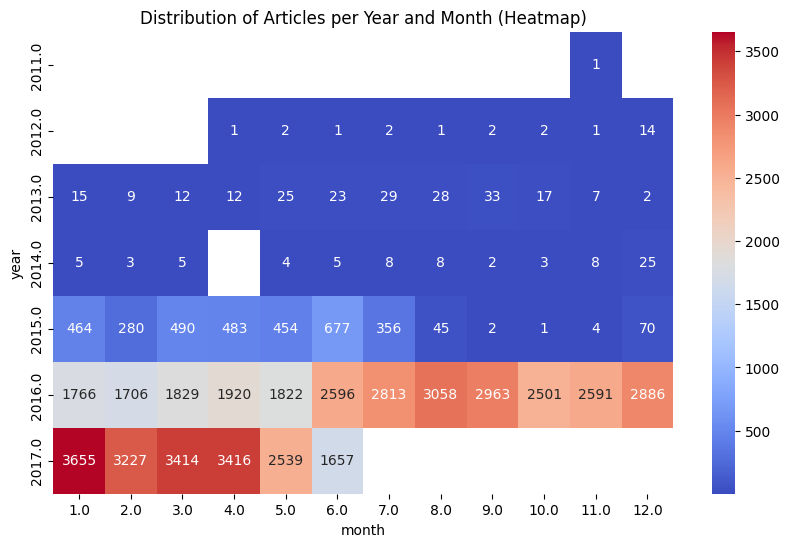

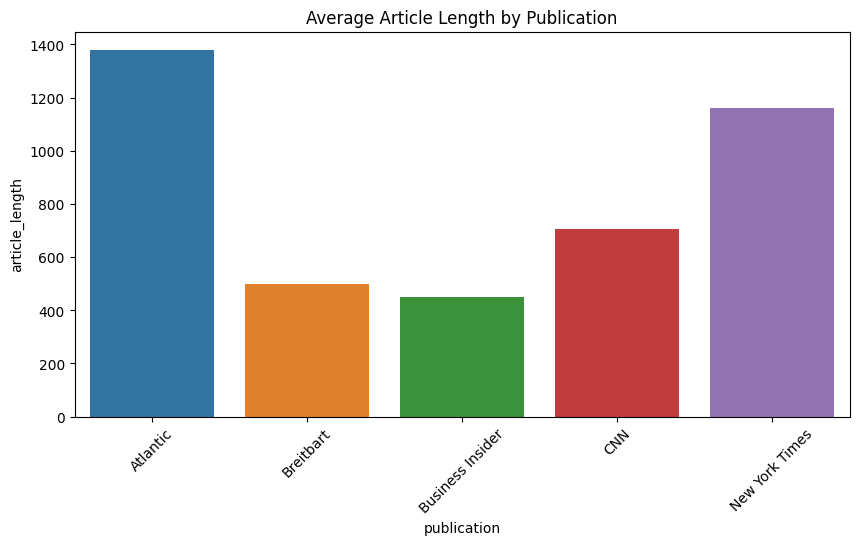

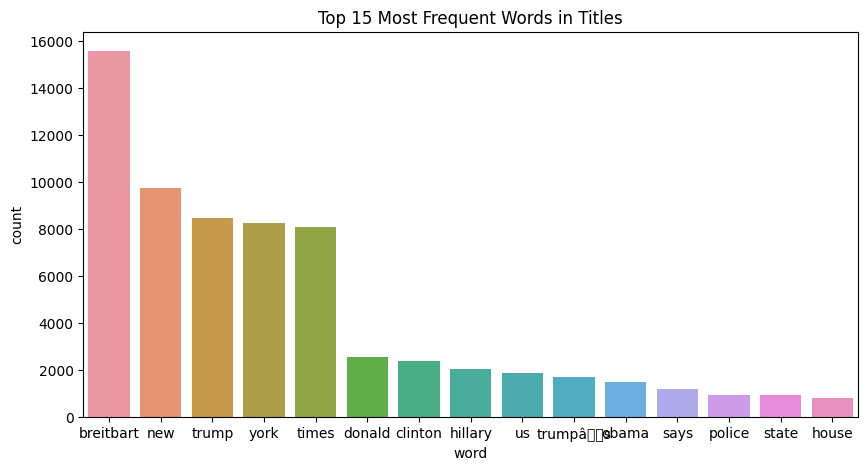

In [ ]:
import plotly.express as px
import plotly.graph_objs as go

# Distribution of articles per year and month (heatmap)
year_month_df1 = df1.groupby(['year', 'month']).size().reset_index(name='count')
year_month_pivot = year_month_df1.pivot('year', 'month', 'count')
plt.figure(figsize=(10, 6))
sns.heatmap(year_month_pivot, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Distribution of Articles per Year and Month (Heatmap)')
plt.show()

# Interactive scatterplot of publication counts per author
author_pub_counts = df1.groupby(['author', 'publication']).size().reset_index(name='count')
fig = px.scatter(author_pub_counts, x='author', y='count', color='publication', hover_name='author', hover_data=['publication'], size='count', title='Publication Counts per Author (Interactive)')
fig.update_xaxes(showticklabels=False)
fig.show()

# Interactive bar chart for the number of articles per publication by year
pub_year_counts = df1.groupby(['publication', 'year']).size().reset_index(name='count')
fig = px.bar(pub_year_counts, x='year', y='count', color='publication', barmode='group', text='count', title='Number of Articles per Publication by Year (Interactive)')
fig.update_traces(textposition='outside')
fig.show()

# Average article length by publication
df1['article_length'] = df1['content'].apply(lambda x: len(x.split()))
avg_length_by_pub = df1.groupby('publication')['article_length'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=avg_length_by_pub, x='publication', y='article_length')
plt.xticks(rotation=45)
plt.title('Average Article Length by Publication')
plt.show()

# Word frequency in titles
from collections import Counter
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english'))

def process_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

title_words = df1['title'].apply(process_text).explode()
word_counts = Counter(title_words).most_common(15)
word_counts_df = pd.DataFrame(word_counts, columns=['word', 'count'])

plt.figure(figsize=(10, 5))
sns.barplot(data=word_counts_df, x='word', y='count')
plt.title('Top 15 Most Frequent Words in Titles')
plt.show()


In [ ]:
df1 = df1[0:10]

summaries_t5 = []
for text in df1['content']:
    summary = generate_summary_t5(text)
    summaries_t5.append(summary)
df1['generated_summary_t5'] = summaries_t5
summaries_bart = []
for text in df1['content']:
    summary = generate_summary_bart(text)
    summaries_bart.append(summary)
df1['generated_summary_bart'] = summaries_bart
summaries_gpt2 = []

rouge = Rouge()
rouge_scores_t5 = []
rouge_scores_bart = []

for i in range(len(df1)):
    reference = df1['title'][i]
    summary = df1['generated_summary_t5'][i]
    scores_summary = rouge.get_scores(summary, reference)
    rouge_scores_t5.append(scores_summary[0])    
df1['rouge_scores_t5'] = rouge_scores_t5
for i in range(len(df1)):
    reference = df1['title'][i]
    summary = df1['generated_summary_bart'][i]
    scores_summary = rouge.get_scores(summary, reference)
    rouge_scores_bart.append(scores_summary[0])    
df1['rouge_scores_bart'] = rouge_scores_bart

mean_rouge_t5 = sum([score['rouge-1']['f'] for score in df1['rouge_scores_t5']])/len(df1)
mean_rouge_bart = sum([score['rouge-1']['f'] for score in df1['rouge_scores_bart']])/len(df1)

print("Mean ROUGE scores:")
print("T5:", mean_rouge_t5)
print("BART:", mean_rouge_bart)

Mean ROUGE scores:
T5: 0.042268740956768705
BART: 0.09555956644356377


In [ ]:
from nltk.translate.bleu_score import corpus_bleu

# Calculate BLEU scores for T5-generated summaries
references = [[title.split()] for title in df1['title']]
summaries = [summary.split() for summary in df1['generated_summary_t5']]
bleu_t5 = corpus_bleu(references, summaries)

# Calculate BLEU scores for BART-generated summaries
references = [[title.split()] for title in df1['title']]
summaries = [summary.split() for summary in df1['generated_summary_bart']]
bleu_bart = corpus_bleu(references, summaries)

print("BLEU scores:")
print("T5:", bleu_t5)
print("BART:", bleu_bart)


BLEU scores:
T5: 7.096830580947996e-232
BART: 2.0882820250736044e-155


In [ ]:
import nltk

def calculate_f1_scores(df1):
    nltk.download('punkt')
    summaries_t5 = df1['generated_summary_t5']
    summaries_bart = df1['generated_summary_bart']
    reference_summaries = df1['title']

    # Calculate F1 scores for T5
    f1_t5 = []
    for summary, reference in zip(summaries_t5, reference_summaries):
        f1 = nltk.translate.bleu_score.sentence_bleu([reference], summary, weights=(1, 0, 0, 0))
        f1_t5.append(f1)

    # Calculate F1 scores for BART
    f1_bart = []
    for summary, reference in zip(summaries_bart, reference_summaries):
        f1 = nltk.translate.bleu_score.sentence_bleu([reference], summary, weights=(1, 0, 0, 0))
        f1_bart.append(f1)

    # Print the F1 scores
    print("F1 score for T5:", sum(f1_t5)/len(f1_t5))
    print("F1 score for BART:", sum(f1_bart)/len(f1_bart))

    return [f1_t5,f1_bart]

In [ ]:
f1s = calculate_f1_scores(df1)

F1 score for T5: 0.20210317159361413
F1 score for BART: 0.21273364470072073


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **Dataset 3**

In [ ]:
df2 = pd.read_csv(r'/content/drive/MyDrive/IR Dataset/News Summary/Reviews.csv', encoding='ISO-8859-1')

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

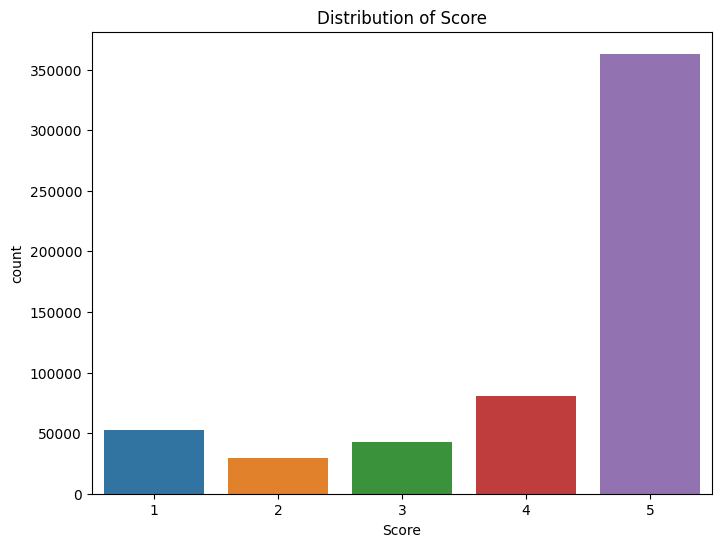

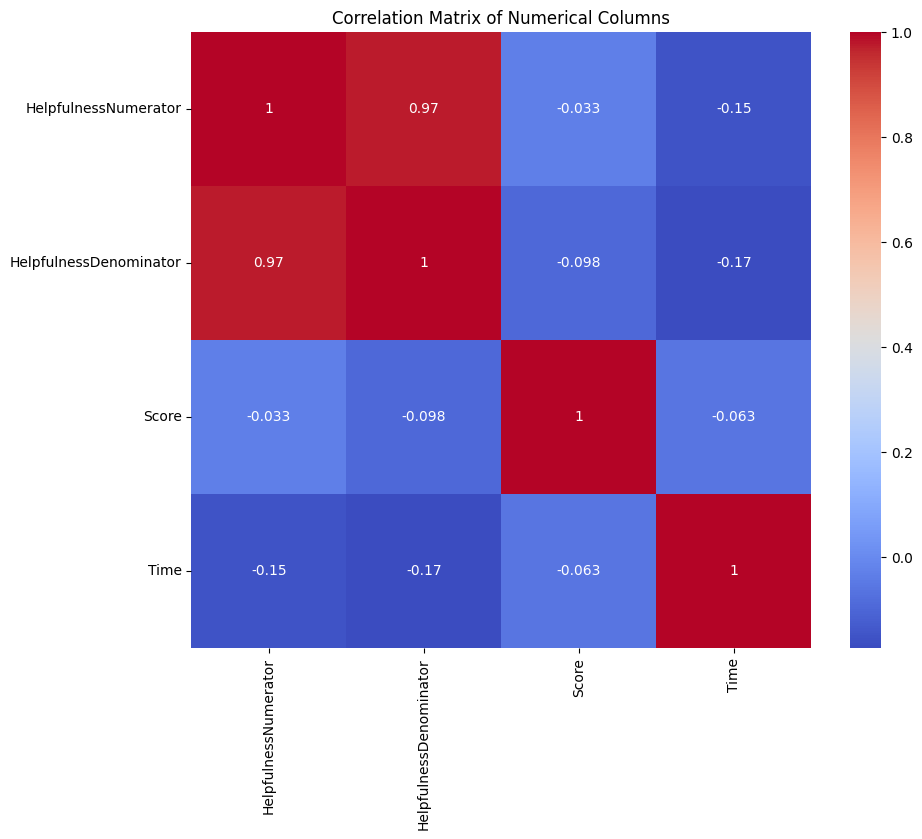

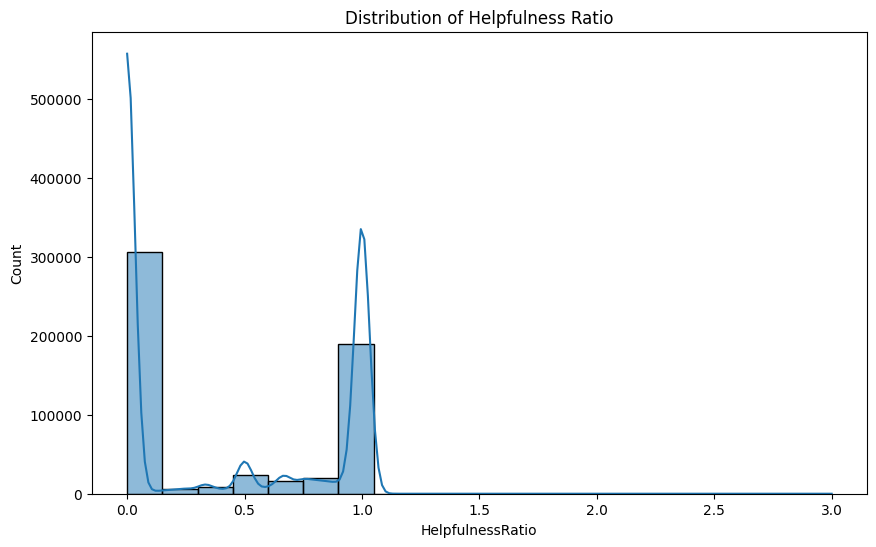

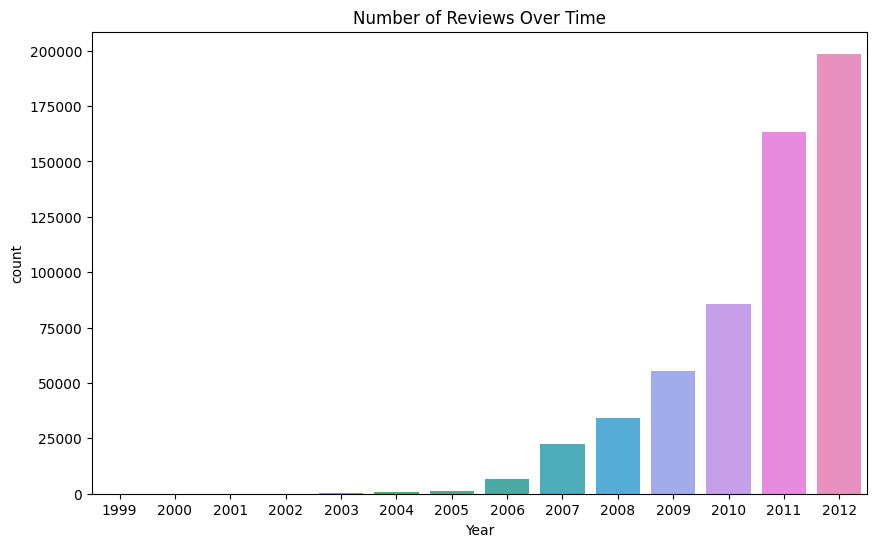

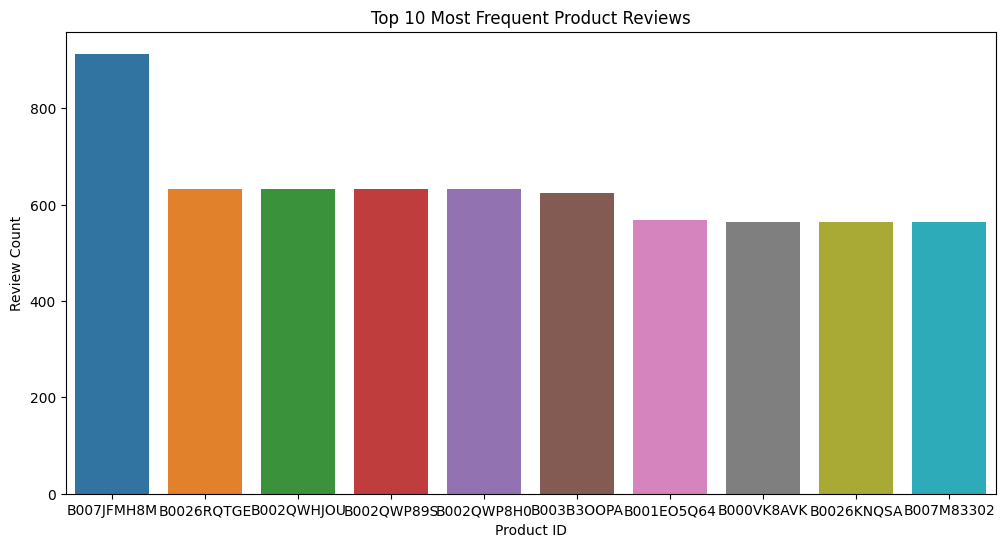

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df2.head())
print(df2.info())

# Plot the distribution of Score
plt.figure(figsize=(8, 6))
sns.countplot(data=df2, x='Score')
plt.title('Distribution of Score')
plt.show()

# Visualize the correlation between the numerical columns
numeric_cols = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']
correlation_matrix = df2[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

# Plot the distribution of Helpfulness ratio
df2['HelpfulnessRatio'] = df2['HelpfulnessNumerator'] / df2['HelpfulnessDenominator']
df2['HelpfulnessRatio'].fillna(0, inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='HelpfulnessRatio', kde=True, bins=20)
plt.title('Distribution of Helpfulness Ratio')
plt.show()

# Analyze the number of reviews over time
df2['Datetime'] = pd.to_datetime(df2['Time'], unit='s')
df2['Year'] = df2['Datetime'].dt.year

plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Year')
plt.title('Number of Reviews Over Time')
plt.show()

# Analyze the top 10 most frequent product reviews
top_products = df2['ProductId'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Most Frequent Product Reviews')
plt.xlabel('Product ID')
plt.ylabel('Review Count')
plt.show()


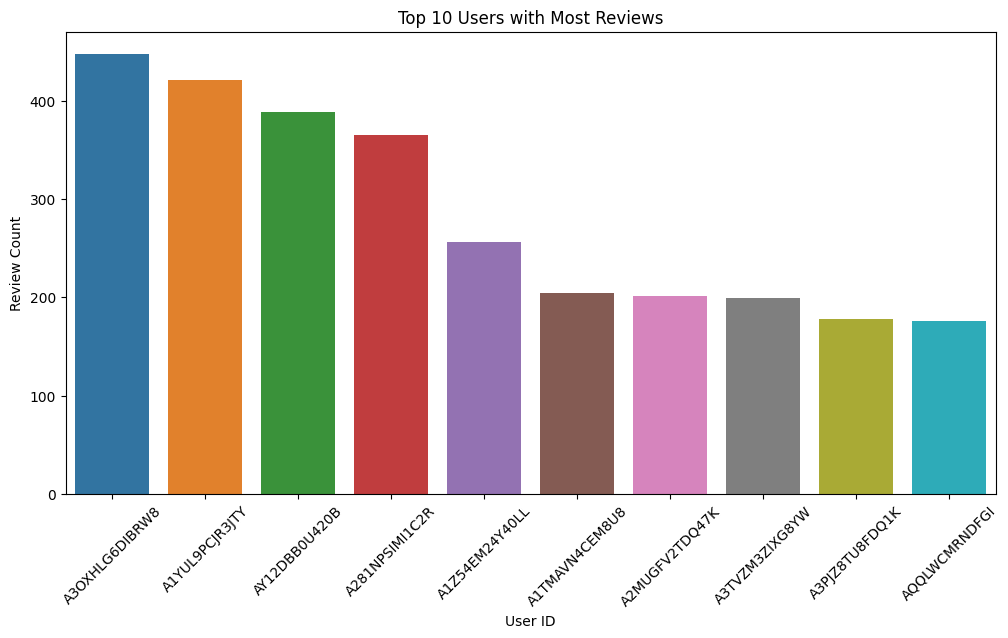

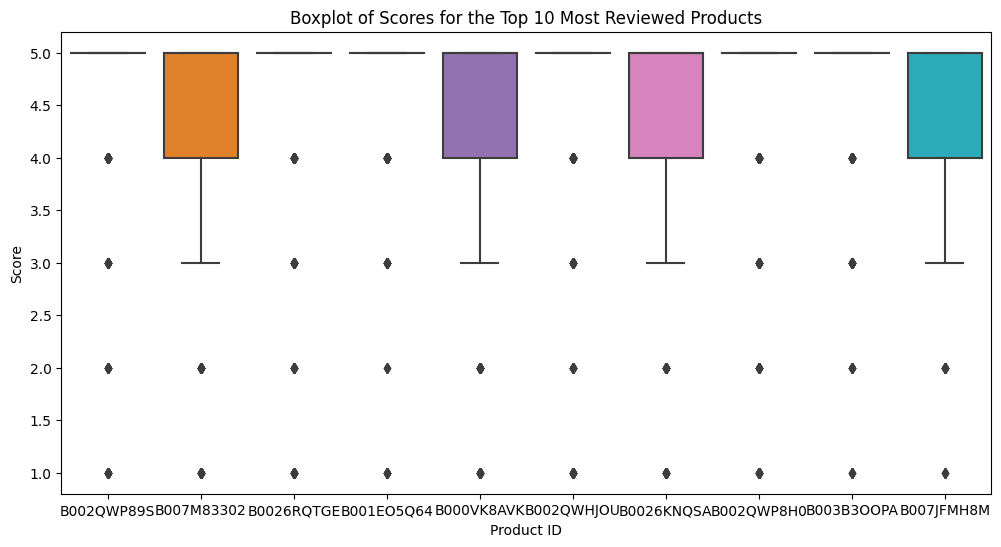

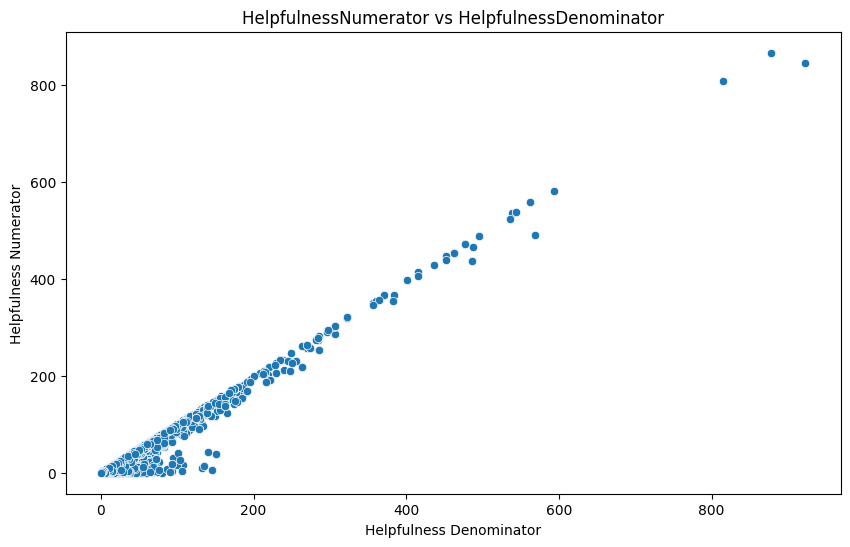

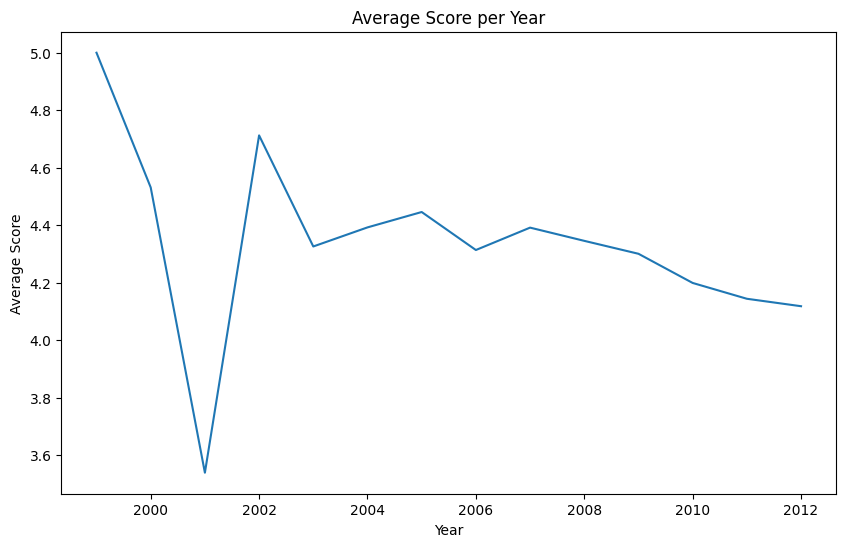

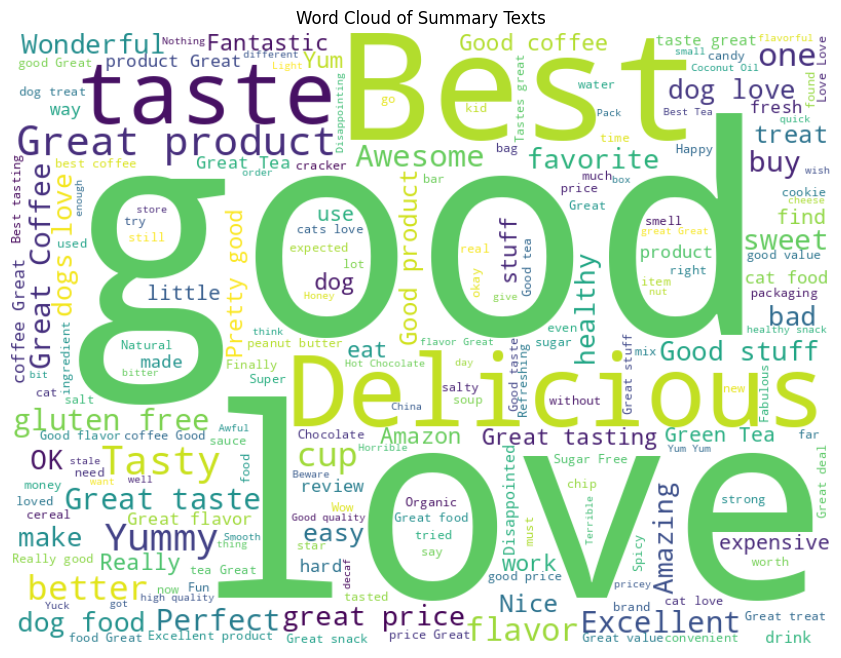

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# 6. Top 10 users with the most reviews
top_users = df2['UserId'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_users.index, y=top_users.values)
plt.title('Top 10 Users with Most Reviews')
plt.xlabel('User ID')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.show()

# 7. Boxplot of scores for the top 10 most reviewed products
top_product_ids = df2['ProductId'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(data=df2[df2['ProductId'].isin(top_product_ids)], x='ProductId', y='Score')
plt.title('Boxplot of Scores for the Top 10 Most Reviewed Products')
plt.xlabel('Product ID')
plt.ylabel('Score')
plt.show()

# 8. Relationship between HelpfulnessNumerator and HelpfulnessDenominator
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='HelpfulnessDenominator', y='HelpfulnessNumerator')
plt.title('HelpfulnessNumerator vs HelpfulnessDenominator')
plt.xlabel('Helpfulness Denominator')
plt.ylabel('Helpfulness Numerator')
plt.show()

# 9. Average score per year
average_score_per_year = df2.groupby('Year')['Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=average_score_per_year, x='Year', y='Score')
plt.title('Average Score per Year')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.show()

# 10. Word cloud of summary texts
summary_text = ' '.join(df2['Summary'].astype(str).tolist())
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=600).generate(summary_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Summary Texts')
plt.show()

In [ ]:
df2 = df2[0:15]

summaries_t5 = []
for text in df2['Text']:
    summary = generate_summary_t5(text)
    summaries_t5.append(summary)
df2['generated_summary_t5'] = summaries_t5
summaries_bart = []
for text in df2['Text']:
    summary = generate_summary_bart(text)
    summaries_bart.append(summary)
df2['generated_summary_bart'] = summaries_bart
summaries_gpt2 = []
for text in df2['Text']:
    summary = generate_summary_gpt2(text)
    summaries_gpt2.append(summary)
df2['generated_summary_gpt2'] = summaries_gpt2
rouge = Rouge()
rouge_scores_t5 = []
rouge_scores_bart = []
rouge_scores_gpt2 = []
for i in range(len(df2)):
    reference = df2['Summary'][i]
    summary = df2['generated_summary_t5'][i]
    scores_summary = rouge.get_scores(summary, reference)
    rouge_scores_t5.append(scores_summary[0])    
df2['rouge_scores_t5'] = rouge_scores_t5
for i in range(len(df2)):
    reference = df2['Summary'][i]
    summary = df2['generated_summary_bart'][i]
    scores_summary = rouge.get_scores(summary, reference)
    rouge_scores_bart.append(scores_summary[0])    
df2['rouge_scores_bart'] = rouge_scores_bart
for i in range(len(df2)):
    reference = df2['Summary'][i]
    summary = df2['generated_summary_gpt2'][i]
    scores_summary = rouge.get_scores(summary, reference)
    rouge_scores_gpt2.append(scores_summary[0])    
df2['rouge_scores_gpt2'] = rouge_scores_gpt2
mean_rouge_t5 = sum([score['rouge-1']['f'] for score in df2['rouge_scores_t5']])/len(df)
mean_rouge_bart = sum([score['rouge-1']['f'] for score in df2['rouge_scores_bart']])/len(df2)
mean_rouge_gpt2 = sum([score['rouge-1']['f'] for score in df2['rouge_scores_gpt2']])/len(df2)

print("Mean ROUGE scores:")
print("T5:", mean_rouge_t5)
print("BART:", mean_rouge_bart)
print("GPT-2:", mean_rouge_gpt2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Mean ROUGE scores:
T5: 0.023317648227718087
BART: 0.05934257516933307
GPT-2: 0.058053845001984045


In [ ]:
from nltk.translate.bleu_score import corpus_bleu

# Calculate BLEU scores for T5-generated summaries
references = [[Summary.split()] for Summary in df2['Summary']]
summaries = [summary.split() for summary in df2['generated_summary_t5']]
bleu_t5 = corpus_bleu(references, summaries)

# Calculate BLEU scores for BART-generated summaries
references = [[Summary.split()] for Summary in df2['Summary']]
summaries = [summary.split() for summary in df2['generated_summary_bart']]
bleu_bart = corpus_bleu(references, summaries)

# Calculate BLEU scores for GPT-2-generated summaries
references = [[Summary.split()] for Summary in df2['Summary']]
summaries = [summary.split() for summary in df2['generated_summary_gpt2']]
bleu_gpt2 = corpus_bleu(references, summaries)

print("BLEU scores:")
print("T5:", bleu_t5)
print("BART:", bleu_bart)
print("GPT-2:", bleu_gpt2)

BLEU scores:
T5: 2.165841076807792e-155
BART: 1.7346597240005626e-155
GPT-2: 1.2606259523256952e-155


In [ ]:
import nltk

def calculate_f1_scores(df):
    nltk.download('punkt')
    summaries_t5 = df2['generated_summary_t5']
    summaries_bart = df2['generated_summary_bart']
    summaries_gpt2 = df2['generated_summary_gpt2']
    reference_summaries = df2['Summary']

    # Calculate F1 scores for T5
    f1_t5 = []
    for summary, reference in zip(summaries_t5, reference_summaries):
        f1 = nltk.translate.bleu_score.sentence_bleu([reference], summary, weights=(1, 0, 0, 0))
        f1_t5.append(f1)

    # Calculate F1 scores for BART
    f1_bart = []
    for summary, reference in zip(summaries_bart, reference_summaries):
        f1 = nltk.translate.bleu_score.sentence_bleu([reference], summary, weights=(1, 0, 0, 0))
        f1_bart.append(f1)

    # Calculate F1 scores for GPT-2
    f1_gpt2 = []
    for summary, reference in zip(summaries_gpt2, reference_summaries):
        f1 = nltk.translate.bleu_score.sentence_bleu([reference], summary, weights=(1, 0, 0, 0))
        f1_gpt2.append(f1)

    # Print the F1 scores
    print("F1 score for T5:", sum(f1_t5)/len(f1_t5))
    print("F1 score for BART:", sum(f1_bart)/len(f1_bart))
    print("F1 score for GPT-2:", sum(f1_gpt2)/len(f1_gpt2))
    return [f1_t5,f1_bart,f1_gpt2]

In [ ]:
f1s = calculate_f1_scores(df2)

F1 score for T5: 0.1559305874128659
F1 score for BART: 0.08060128208525744
F1 score for GPT-2: 0.062344563509552885


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
